<a href="https://colab.research.google.com/github/Nelson-Webinger/data-3000/blob/main/exams/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA-3000 Final Exam

## Grading Rubric

This final will be worth 15% of your total grade for this course. It will be graded out of 50 points, divided across 2 sections:

  - Model Building: 25 points
    - 15 points will be awarded for the actual model building (evaluating your Python code)
    - 10 points will be awarded for the text commentary narrating your choices and explaining your rationale
  - Model Validation/Evaluation: 25 points
    - 5 points will be awarded by default, but may be subtracted from if there are substantial errors in your model building that negatively impact the validity of your model
    - 10 points will be awarded for the actual model validation and evaluation (evaluating your Python code)
    - 10 points will be awarded for the text commentary narrating your choices and explaining your rationale

> **NOTE:** You will NOT be evaluated on whether you model actually makes accurate predictions or not

## Using Additional Resources

This is an open-resource exam. You may use any available resources as references. I will be available for any questions that you have during the exam.

Remember that all work must still be your own, and that this exam is governed by the [Policy on Academic Honesty outlined in our course syllabus](https://docs.google.com/document/d/1EbtvuI26-c-bL5TfAHpT6hX0uXzMIz7sKfn0c6fh2nw/edit?tab=t.0#heading=h.r0b18a8gh450).

-----

# Image Classification: Horse or Human OR BEES!


For this exercise, we are going to use a dataset of images of both horses and humans, taken from [TensorFlow Datasets](https://www.tensorflow.org/datasets/catalog/horses_or_humans).

For this exercise, choose one of either the Horses or Human dataset, or the Bees dataset. Code to load each is included below.

Our horses dataset contains 1,027 training images (300x300 pixels in full color) and 256 testing images, as well as a category label for each image.

Our bees dataset contains _some number of_ training images (300x150 pixels in full color) and _additional_ testing images, as well as a category label for each image. Note that this is a multi-class classification problem. For full details of all possible classes, refer to the [Tensorflow dataset page](https://www.tensorflow.org/datasets/catalog/bee_dataset#bee_datasetbee_dataset_300_default_config)

In [29]:
!pip install focal-loss

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

## Importing the Data

First, let's download our dataset and take a look at what it contains:

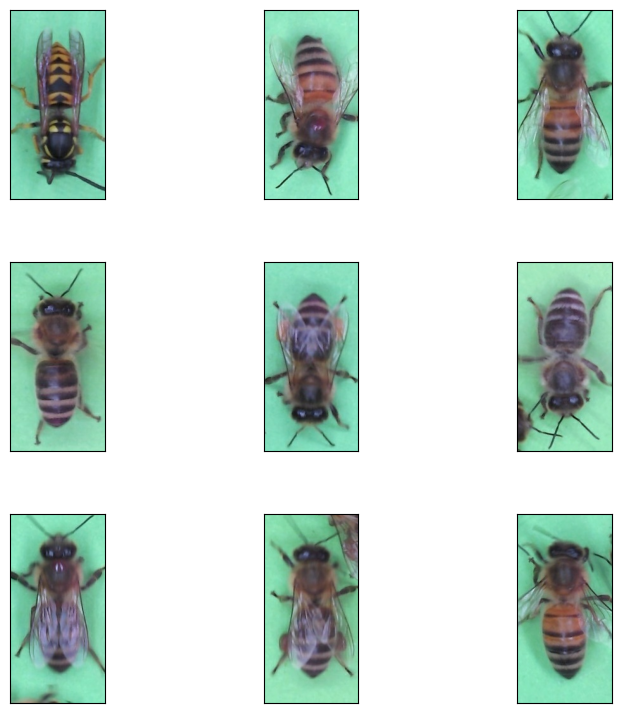

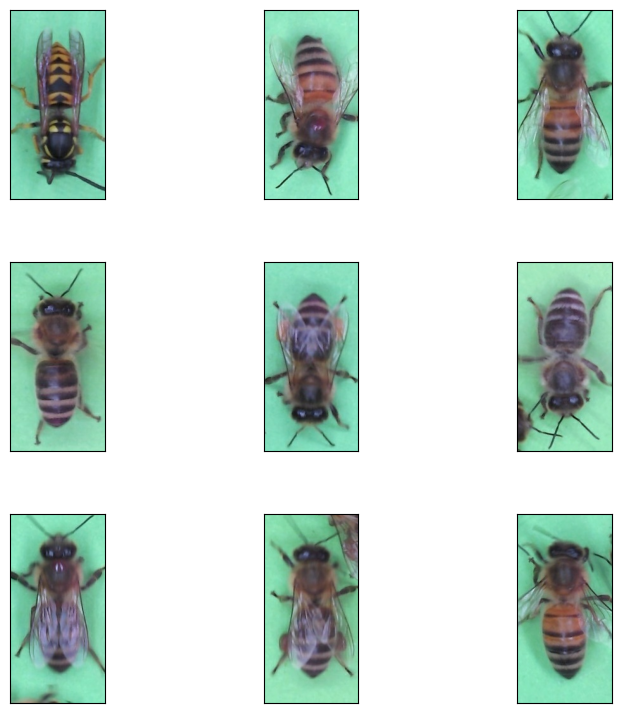

In [50]:
# Load the bees dataset

x_train, y_train = tfds.load(
    'bee_dataset/bee_dataset_300',
    split='train',
    shuffle_files=True,
    as_supervised=True,
    batch_size=-1)


viz_data, ds_info = tfds.load(
    'bee_dataset/bee_dataset_300',
    split='train[:10]',
    shuffle_files=True,
    with_info=True)
tfds.visualization.show_examples(viz_data, ds_info)

In [ ]:
y_train

{'cooling_output': <tf.Tensor: shape=(7490,), dtype=float64, numpy=array([0., 0., 0., ..., 0., 0., 0.])>,
 'pollen_output': <tf.Tensor: shape=(7490,), dtype=float64, numpy=array([0., 0., 0., ..., 0., 0., 1.])>,
 'varroa_output': <tf.Tensor: shape=(7490,), dtype=float64, numpy=array([0., 1., 0., ..., 0., 0., 0.])>,
 'wasps_output': <tf.Tensor: shape=(7490,), dtype=float64, numpy=array([1., 0., 0., ..., 0., 0., 0.])>}

In [51]:
import pandas as pd
y_train = pd.DataFrame(y_train)
y_train

,cooling_output,pollen_output,varroa_output,wasps_output
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
7485,0.0,0.0,0.0,0.0
7486,0.0,0.0,0.0,1.0
7487,0.0,0.0,0.0,0.0
7488,0.0,0.0,0.0,0.0


In [46]:

# majority_class = y_train['cooling_output'].value_counts().idxmax()
# minority_class = y_train['cooling_output'].value_counts().idxmin()

# # Separate majority and minority classes
# df_majority = y_train[y_train['cooling_output'] == majority_class]
# df_minority = y_train[y_train['cooling_output'] == minority_class]

# # Oversample minority class
# df_minority_oversampled = df_minority.sample(n=len(df_majority), replace=True, random_state=42)

# # Combine majority class with oversampled minority class
# df_balanced = pd.concat([df_majority, df_minority_oversampled])

# # Verify the balance
# print(df_balanced['cooling_output'].value_counts())

cooling_output
0.0    6349
1.0    6349
Name: count, dtype: int64


In [47]:
# df_balanced = df_balanced['cooling_output']

In [16]:
y_train.describe()

,cooling_output,pollen_output,varroa_output,wasps_output
count,7490.000000,7490.000000,7490.000000,7490.000000
mean,0.152336,0.138184,0.169025,0.126836
std,0.359371,0.345116,0.374799,0.332811
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
# # OR
# # Load the horses dataset
# X_train, y_train = tfds.load(
#     'horses_or_humans',
#     split='train',
#     shuffle_files=True,
#     as_supervised=True,
#     batch_size=-1)
# X_test, y_test = tfds.load(
#     'horses_or_humans',
#     split='test',
#     shuffle_files=True,
#     as_supervised=True,
#     batch_size=-1)

# viz_data, ds_info = tfds.load(
#     'horses_or_humans',
#     split='train[:10]',
#     shuffle_files=True,
#     with_info=True)
# tfds.visualization.show_examples(viz_data, ds_info)

## Extra Credit

For 3 points of extra credit, use TensorFlow's Keras preprocessing layers to create **synthetic training data**. To do this, you can, for example:
  - Create new records that rotate the original images a random number of degrees;
  - Create new records that mirror the original images left-to-right or top-to-bottom;
  - Create new records that partially crop the original images;
  - Create records that introduce noise to the original images;
  - etc.

  For more detail on how to do this, refer to the [Data Augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) TensorFlow tutorial, and take a look at the [Image Super-Resolution](#scrollTo=aNGRuJahuk26) section of the final below.

## Model Building

Build a Convolutional Neural Network to classify each image as either a horse or a human.

Provide a narrative explanation of your choices to accompany any code. Your narrative should be substantive and enough for someone with little to no familiarity with CNNs to be able to understand what you are doing. By way of example, this should include discussion of what the major elements of a CNN are and what they do, as well as detail about your choices in parameters such as filter size and stride (or others as necessary).

In [86]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Dropout

#input layer
img_input = layers.Input(shape=(300, 150, 3))

#augmentation layers
rotated_layer = layers.RandomRotation(0.1)(img_input)
translated_layer = layers.RandomTranslation(0.1, 0.1)(rotated_layer)
zoomed_layer = layers.RandomZoom(0.1)(translated_layer)

rescaled_input = layers.Rescaling(1./255)(zoomed_layer)


Here we first define the input as 300 by 150 by 3. this is because the images are 300 pixels by 150 pixels and because they are in color there are three layers, one for red green and blue.

In [87]:
#convolution modules
x = layers.Conv2D(16, 3, activation='relu')(rescaled_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

Here we condense the image down. The convolution layers take the red green and blue values from several adjacent pixels multiples them by some weight (that is the part that changes over time to allow the model to learn) and then sums all the values. then the max pooling layer simply takes the highest value output from a group of pixels from the convolutional layer as another way to condese the information in the images. the actuall values such as size of the reference frames for the layers have worked previously but could be modified if the model underperforms.

In [88]:
#dropout layer
dropout_layer = Dropout(0.2)(x)

the dropout layer makes the model ignore differnet parts of the data for each trainng iteration this helps prevent the model from just memorizing the images.

In [89]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(dropout_layer)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)

output = layers.Dense(4, activation="softmax")(x)

this code connects al the data that has been converted into a format readable by our model and feeds it into the model. we have to dense layers that are the "brain" of the model.  we use the relu activaiton function that willl replace all negative valuse with 0 because a negative probability dosent make sense and generally you want to decrease the number of nodes toward the number of classes as you advance through the neural network: 512, 256, 128. Finally, we have the output layer with 4 options for our 4 classes of bees and the softmax activation function because it allows for the model to select multiple classes for one observation.

In [90]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy

model = Model(img_input, output)
model.compile(loss=CategoricalCrossentropy,
              optimizer=RMSprop(learning_rate=0.001),
              metrics=[CategoricalAccuracy])

In [91]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    validation_split=0.2,
    verbose=2)

Epoch 1/15
188/188 - 13s - 68ms/step - categorical_accuracy: 0.2577 - loss: 22459014.0000 - val_categorical_accuracy: 0.1669 - val_loss: 130473504.0000
Epoch 2/15
188/188 - 17s - 91ms/step - categorical_accuracy: 0.2555 - loss: 1544568576.0000 - val_categorical_accuracy: 0.1308 - val_loss: 5311207424.0000
Epoch 3/15
188/188 - 10s - 53ms/step - categorical_accuracy: 0.2455 - loss: 18559160320.0000 - val_categorical_accuracy: 0.1669 - val_loss: 20056504320.0000
Epoch 4/15
188/188 - 9s - 46ms/step - categorical_accuracy: 0.2595 - loss: 110690508800.0000 - val_categorical_accuracy: 0.1322 - val_loss: 233350889472.0000
Epoch 5/15
188/188 - 10s - 55ms/step - categorical_accuracy: 0.2597 - loss: 462666891264.0000 - val_categorical_accuracy: 0.1308 - val_loss: 1416554610688.0000
Epoch 6/15
188/188 - 8s - 43ms/step - categorical_accuracy: 0.2492 - loss: 1497912967168.0000 - val_categorical_accuracy: 0.1669 - val_loss: 2712426774528.0000
Epoch 7/15
188/188 - 10s - 55ms/step - categorical_accurac

Text(0.5, 1.0, 'Training and validation loss')

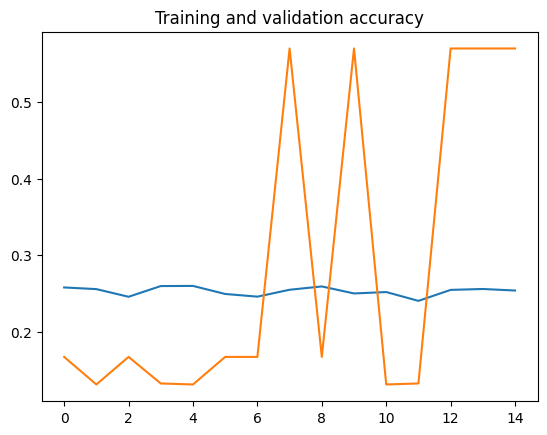

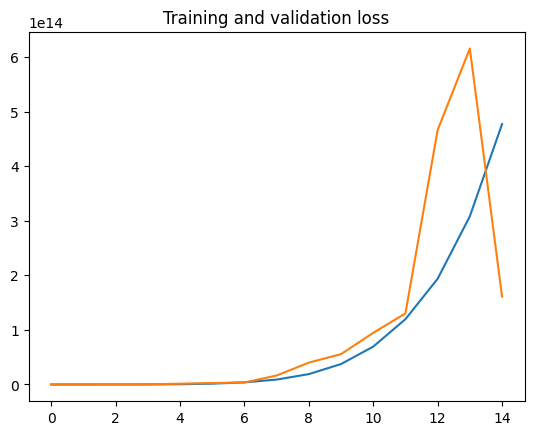

In [92]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


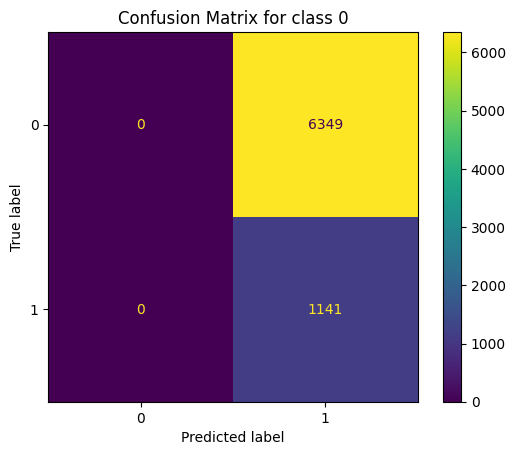

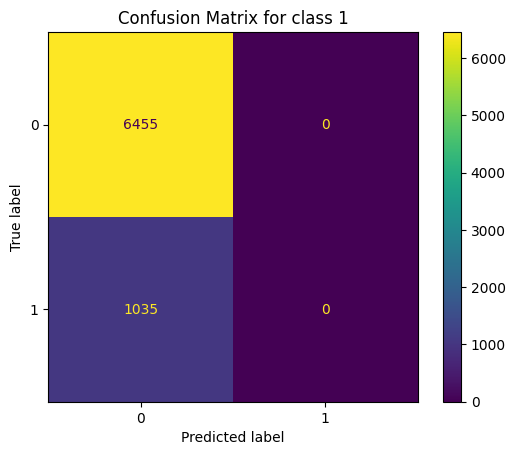

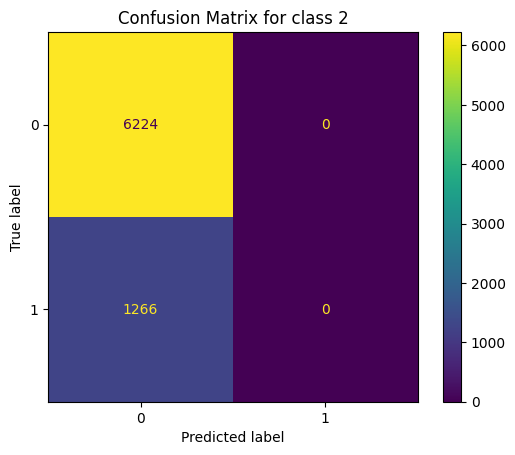

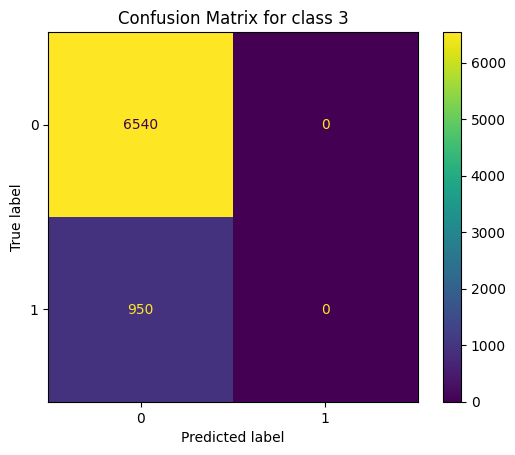

In [97]:
preds = model.predict(x_train)

import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

# Generate multilabel confusion matrices
conf_matrices = multilabel_confusion_matrix(y_train, preds)

# Plot each confusion matrix
for i, cm in enumerate(conf_matrices):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for class {i}')
    plt.show()

## Model Evaluation

After training your model, evaluate its performance. What metric(s) did you choose to optimize on? Would you say that your model performed well or poorly? How did you evaluate its performance to arrive at that conclusion?

Minimally, you should consider evaluating:
  - Your model's accuracy on the training and testing datasets;
  - Your model's loss over time as it trained;
  - A confusion matrix of your model's true and false positive and negative predictions; and
  - Holistically whether your model performs "well" enough for the classification task, and why or why not

-----

<a id="scrollTo=aNGRuJahuk26"></a>

# Image Super-Resolution

> **NOTE:** This section of the final is **optional**. If you choose to complete it, it will contribute to both the "Model Building" and "Model Evaluation" portions of the grading rubric in addition to the image classifier you have already built. This will mean that grading is more lenient; however, you will have to do additional work. There is no penalty for choosing to not complete this section.

For this task, you will build an autoencoder that takes an image and creates a super-resolution version of that image. I.e., it _upscales_ the image to fill in more detail than was originally present.

To build this model, we will use the same dataset as in the previous example; however, with a small twist. Your training data will be images of horses and humans that have been downsampled to 150x150 pixels, and your model output will be the **exact same** images, but at the original 300x300 pixel resolution. To help get started, I have prepared a training and testing dataset of these images for you:

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(150, 150),
  tf.keras.layers.Resizing(300, 300),
  tf.keras.layers.Rescaling(1./255)
])

X_train_2 = resize_and_rescale(X_train, training=True)
X_test_2 = resize_and_rescale(X_test, training=True)

As we can see, the image on the right is the one we have downscaled and it shows an obvious loss of detail compared to the original on the left. Let's see if our supersampling autoencoder is able to clear up the image resolution!

In [ ]:
orig_img = next(iter(X_train))
downscaled_img = next(iter(X_train_2))

plt.figure(figsize=(10, 10))

ax = plt.subplot(1, 2, 1)
plt.imshow(orig_img)

ax = plt.subplot(1, 2, 2)
plt.imshow(downscaled_img)

Finally, we will also create new y variables for our model to use as a ground truth against which to compare its predictions. These will just be the original 300x300 pixel images:

In [ ]:
# Instead of "horse" or "human" labels,
# our y variable will now be the original
# 300x300 pixel images
y_train_2 = X_train
y_test_2 = X_test

You should reference our [Autoencoders Lab](https://github.com/wetherc/data-2000/blob/main/labs/11-16_autoencoders.ipynb) for guidance on how to structure your model. Importantly, remember:

  - Your model's input should have a shape that matches the input's pixel size (300x300 pixels --- remember, we downscaled the images and then stretched them back to their original dimensions);
  - Your model's output should have a shape that matches the output's pixel size (300x300 pixels);
  - Your convolutional and deconvolutional layers should be careful to evenly divide your images so that you don't have rounding issues from fractional pixels;
  - For your model's final layer, you should use TensorFlow's [UpSampling2D layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D) followed by one or more Convolutional2D layers

## Model Building

Build a convolutional autoencoder to upscale the input images back to their original pixel resolution.

Provide a narrative explanation of your choices to accompany any code. Your narrative should be substantive and enough for someone with little to no familiarity with CNNs to be able to understand what you are doing. By way of example, this should include discussion of what the major elements of a CNN are and what they do, as well as detail about your choices in parameters such as filter size and stride (or others as necessary).

## Model Evaluation

After training your model, evaluate its performance. What metric(s) did you choose to optimize on? Would you say that your model performed well or poorly? How did you evaluate its performance to arrive at that conclusion?

Minimally, you should consider evaluating:
  - Your model's accuracy on the training and testing datasets;
  - Your model's loss over time as it trained;
  - A visual comparison of your upsampled predicted images and the original 300x300 pixel images;
  - Holistically whether your model performs "well" enough for the classification task, and why or why not